In [15]:
import cv2
import numpy as np
import pyautogui
import win32gui
from PyQt5.QtWidgets import QApplication
from PIL import Image, ImageQt
import sys

from ultralyticsplus import YOLO, render_result


In [6]:
model = YOLO('keremberke/yolov8m-csgo-player-detection')

model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image


In [7]:
def convert_qimage_to_mat(incoming_image):
    '''  Converts a QImage into an opencv MAT format  '''
    # Format_RGB32 = 4,存入格式为B,G,R,A 对应 0,1,2,3
    # RGB32图像每个像素用32比特位表示，占4个字节，
    # R，G，B分量分别用8个bit表示，存储顺序为B，G，R，最后8个字节保留
    incoming_image = incoming_image.convertToFormat(4)
    width = incoming_image.width()
    height = incoming_image.height()

    ptr = incoming_image.bits()
    ptr.setsize(incoming_image.byteCount())
    arr = np.array(ptr).reshape(height, width, 4)  # Copies the data
    # arr为 BGRA，4通道图片
    return arr

In [8]:
hwnd_title = dict()
def get_all_hwnd(hwnd, mouse):
    if win32gui.IsWindow(hwnd) and win32gui.IsWindowEnabled(hwnd) and win32gui.IsWindowVisible(hwnd):
        hwnd_title.update({hwnd: win32gui.GetWindowText(hwnd)})

win32gui.EnumWindows(get_all_hwnd, 0)

for h, t in hwnd_title.items():
    if t != "":
        print(h, t)

2296762 Cheat_FPS – trivial.ipynb
722900 Counter-strike  Global Offensive 2023.02.27 - 21.56.46.01.mp4 - PotPlayer
394970 概率论 - Note - Obsidian v1.1.16
1574266 设置
852434 设置
131186 Microsoft Text Input Application
721994 Data
330610 Anaconda
328946 keremberke/yolov8m-csgo-player-detection · Hugging Face 和另外 1 个页面 - 个人 - Microsoft​ Edge
526210 172.30.232.7:46692 - 远程桌面连接
65890 Program Manager


In [9]:
hwnd = win32gui.FindWindow(None, 'Counter-strike  Global Offensive 2023.02.27 - 21.56.46.01.mp4 - PotPlayer')
app = QApplication(sys.argv)
screen = app.primaryScreen()

In [10]:
a = (screen.size().width(), screen.size().height())
a


(4500, 3000)

In [11]:
img = screen.grabWindow(hwnd).toImage()

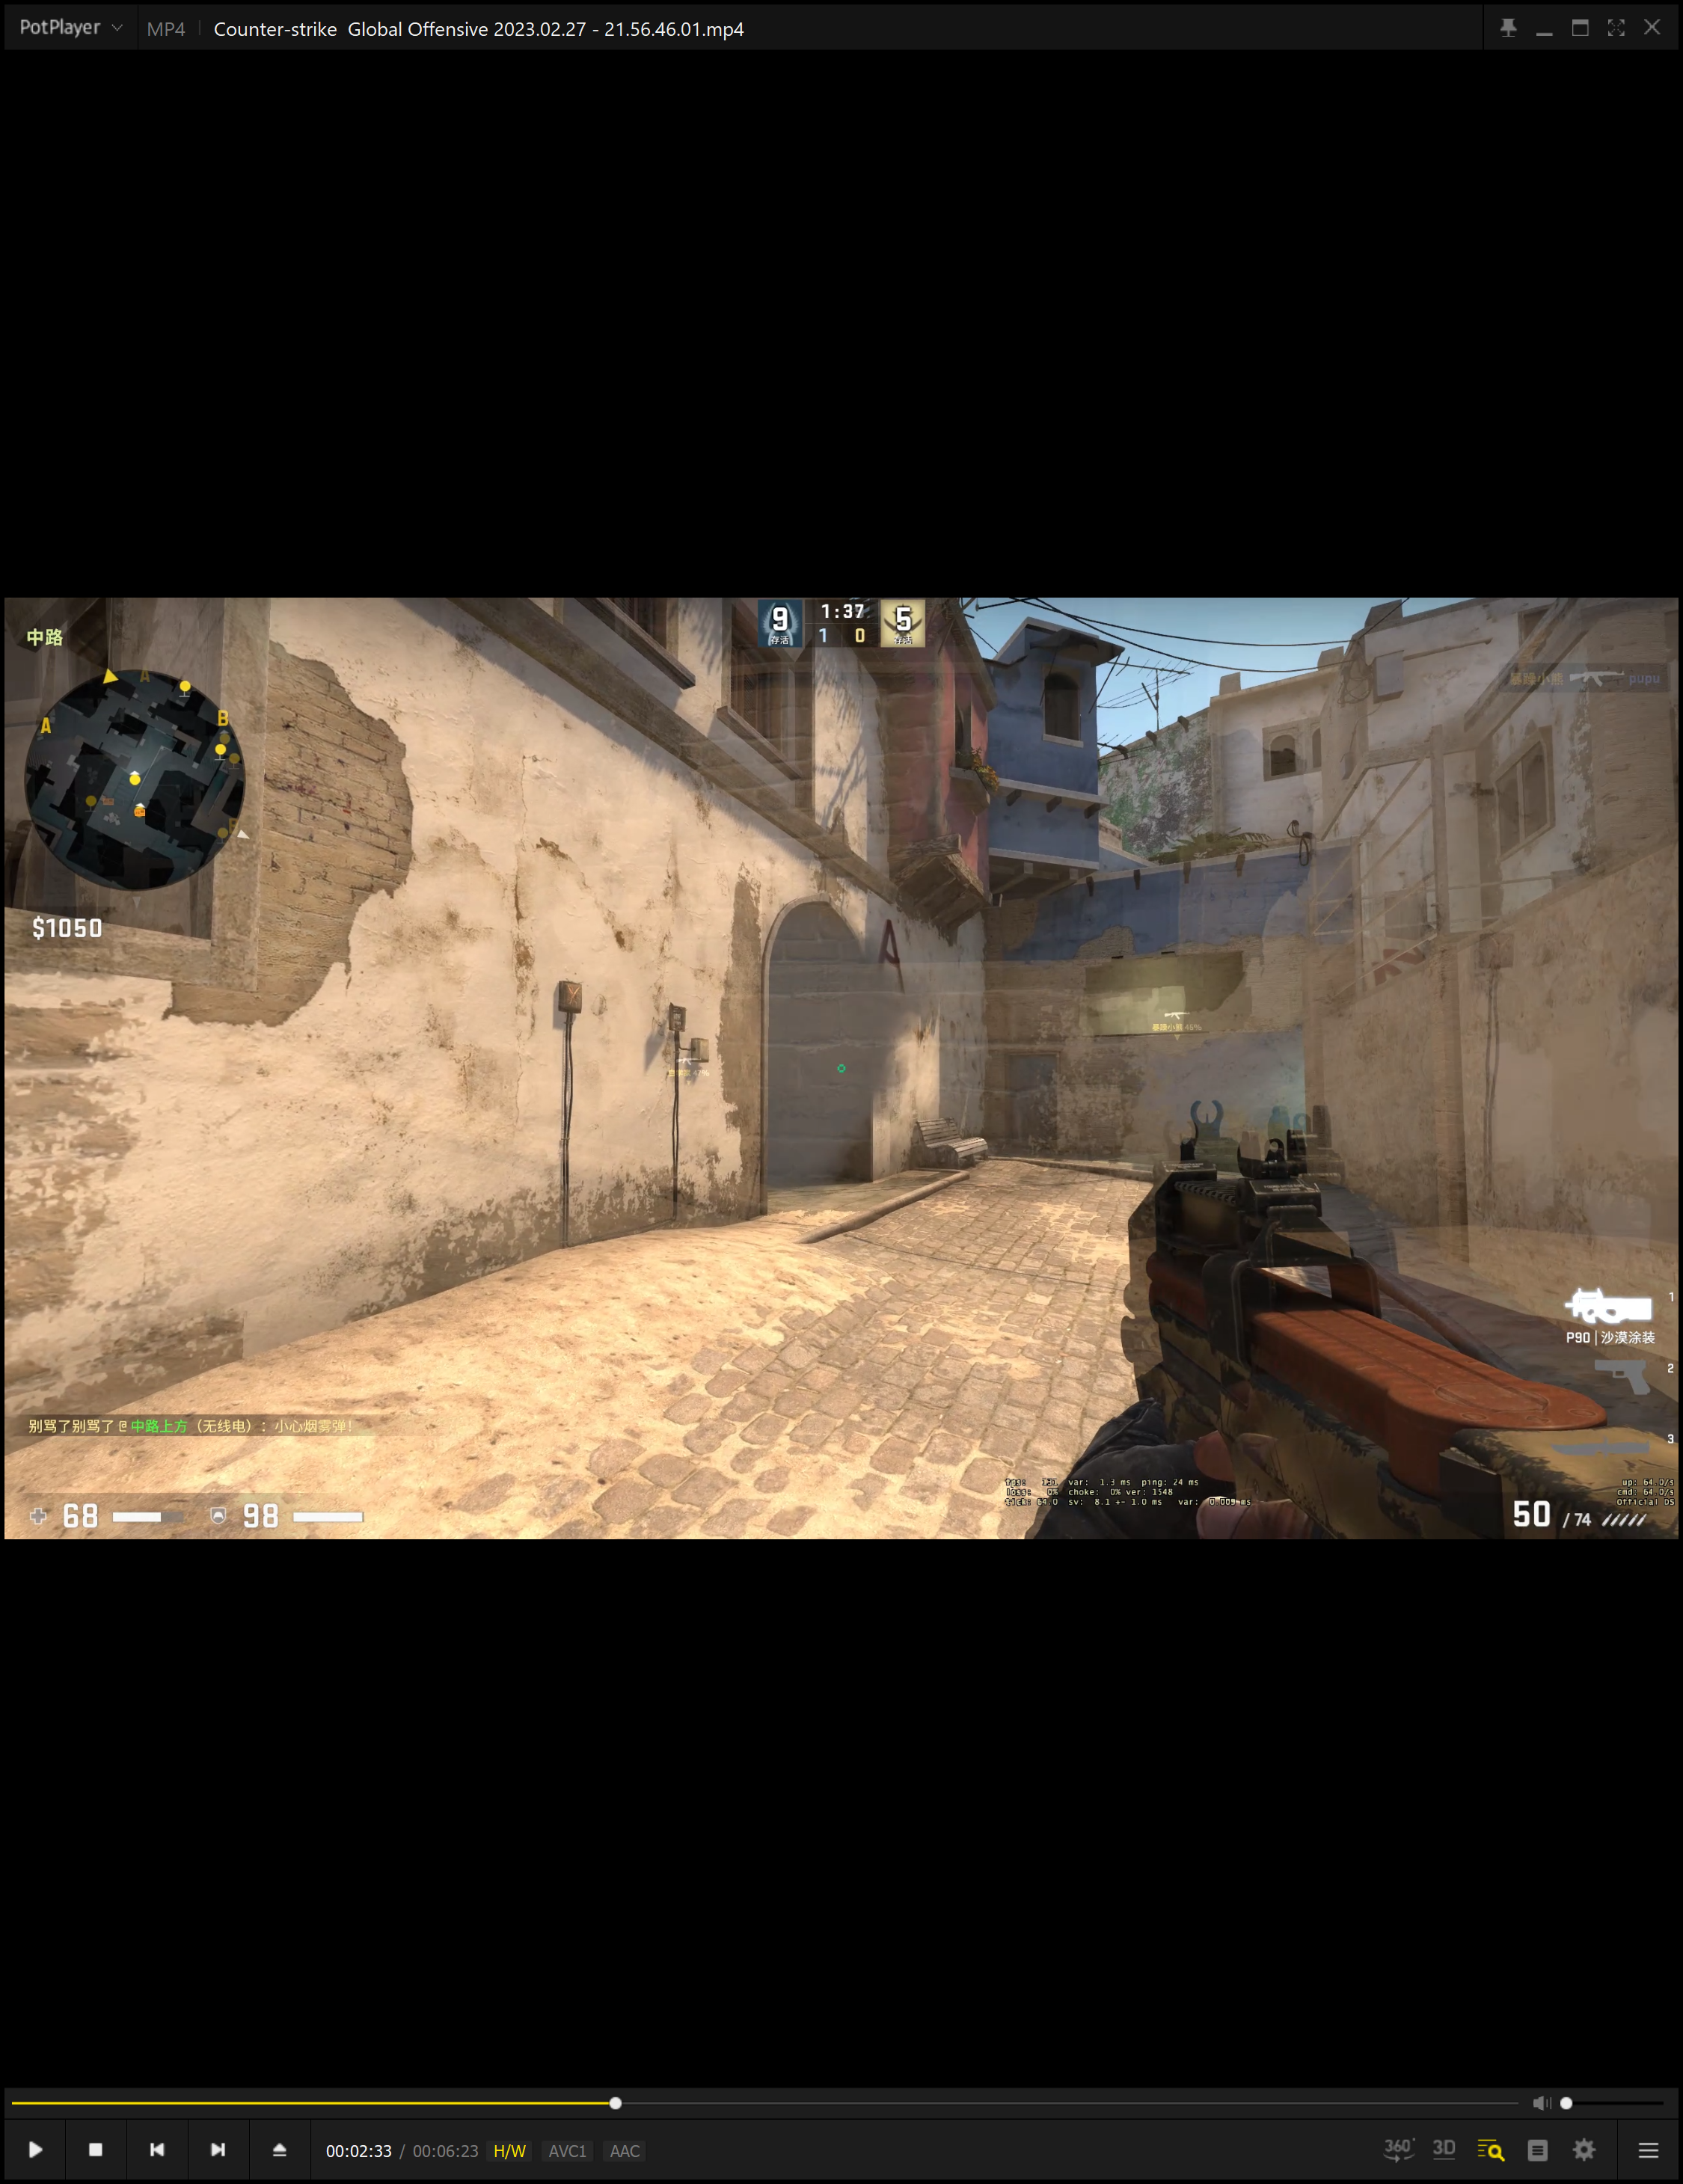

In [18]:
image = ImageQt.fromqimage(img)

In [9]:
w,h = img.size().width(), img.size().height()
w, h

(2560, 1440)

In [ ]:
while True:

    img = screen.grabWindow(hwnd).toImage()
    img = convert_qimage_to_mat(img)
    cv2.namedWindow('image', cv2.WINDOW_NORMAL)
    cv2.imshow('image', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    cv2.waitKey(0)
    cv2.destroyAllWindows()



In [ ]:

img = pyautogui.screenshot()

In [ ]:
cv2.imshow('image', img)

In [1]:
def video_record(self, window_name, video_name, fps=25):
    hwnd = win32gui.FindWindow(None, window_name)
    app = QApplication(sys.argv)
    screen = app.primaryScreen()
    screen_size = (screen.size().width(), screen.size().height())
    video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'XVID'), fps, screen_size)
    while self.recording:
        screen = app.primaryScreen()
        img = convert_qimage_to_mat(screen.grabWindow(hwnd).toImage())
        video.write(img)


SyntaxError: incomplete input (544181125.py, line 1)

In [20]:
model = YOLO('keremberke/yolov8m-csgo-player-detection')

model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image


In [23]:
results = model.predict(image)
print(results[0].boxes)
render = render_result(model=model, image=image, result=results[0])
render.show()



0: 640x512 1 ct, 192.3ms
Speed: 4.3ms preprocess, 192.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


tensor([[1.39900e+03, 1.49500e+03, 1.69400e+03, 1.99700e+03, 5.03826e-01, 0.00000e+00]], device='cuda:0')
